## Loading Data and Visualizations

In [2]:
!pip3 install yfinance

In [3]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [27]:
raw_data = yf.download('TSLA', start='2017-01-01', end='2023-11-30')

[*********************100%%**********************]  1 of 1 completed


In [28]:
raw_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500
...,...,...,...,...,...,...
2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600
2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200
2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800


In [29]:
raw_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [30]:
raw_data.pipe

<bound method NDFrame.pipe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03   14.324000   14.688667   14.064000   14.466000   14.466000   
2017-01-04   14.316667   15.200000   14.287333   15.132667   15.132667   
2017-01-05   15.094667   15.165333   14.796667   15.116667   15.116667   
2017-01-06   15.128667   15.354000   15.030000   15.267333   15.267333   
2017-01-09   15.264667   15.461333   15.200000   15.418667   15.418667   
...                ...         ...         ...         ...         ...   
2023-11-22  242.039993  244.009995  231.399994  234.210007  234.210007   
2023-11-24  233.750000  238.750000  232.330002  235.449997  235.449997   
2023-11-27  236.889999  238.330002  232.100006  236.080002  236.080002   
2023-11-28  236.679993  247.000000  234.009995  246.720001  246.720001   
2023-11-29  249.210007  252.750000  242.759995  244.139999  244.139999   

       

### Line plots and matplotlib plots

In [31]:
def fix_cols(df):
    columns = df.columns
    outer = [col for col in columns]
    df.columns = outer
    return df

In [32]:
raw_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: xlabel='Date'>

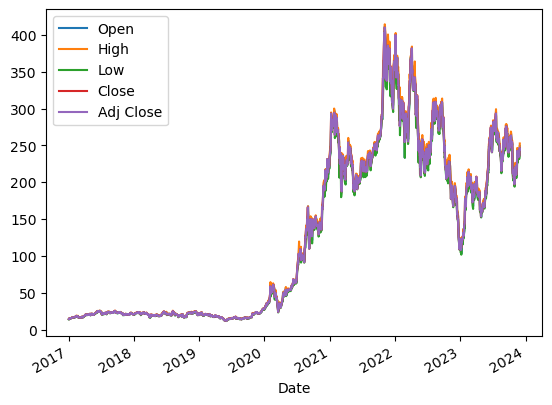

In [38]:
(raw_data
 .iloc[:, :-1:]
 .pipe(fix_cols)
 .plot()
 )

<Axes: xlabel='Date'>

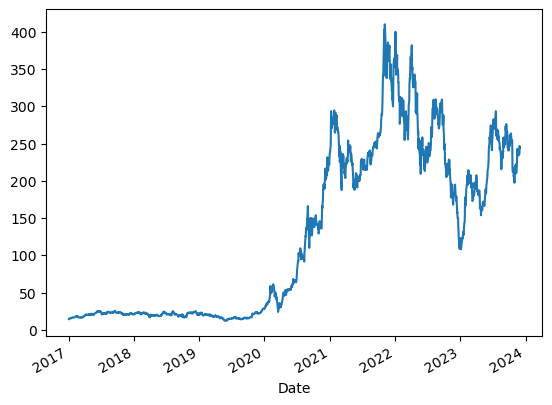

In [36]:
(raw_data
 .pipe(fix_cols)
 .Close
 .plot()
 )

<Axes: xlabel='Date'>

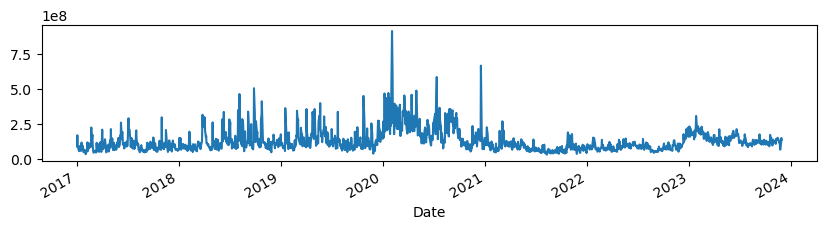

In [39]:
(raw_data
 .pipe(fix_cols)
 .Volume
 .plot(figsize=(10,2))
 )

### Resampling

In [41]:
(raw_data
 .pipe(fix_cols)
 .Close
 )

Date
2017-01-03     14.466000
2017-01-04     15.132667
2017-01-05     15.116667
2017-01-06     15.267333
2017-01-09     15.418667
                 ...    
2023-11-22    234.210007
2023-11-24    235.449997
2023-11-27    236.080002
2023-11-28    246.720001
2023-11-29    244.139999
Name: Close, Length: 1739, dtype: float64

In [43]:
# Resample the data with M wich is an offset alias, it means that aggregate the date by months
# If we wouldn't use the .mean() than we would get an object but not a dataframe
(raw_data
 .pipe(fix_cols)
 .resample('M')
 .Close
 .mean()
 )

Date
2017-01-31     15.954700
2017-02-28     17.580737
2017-03-31     17.210435
2017-04-30     20.317228
2017-05-31     21.101606
                 ...    
2023-07-31    273.505500
2023-08-31    242.333043
2023-09-30    256.968000
2023-10-31    236.907727
2023-11-30    228.878500
Freq: M, Name: Close, Length: 83, dtype: float64

<Axes: xlabel='Date'>

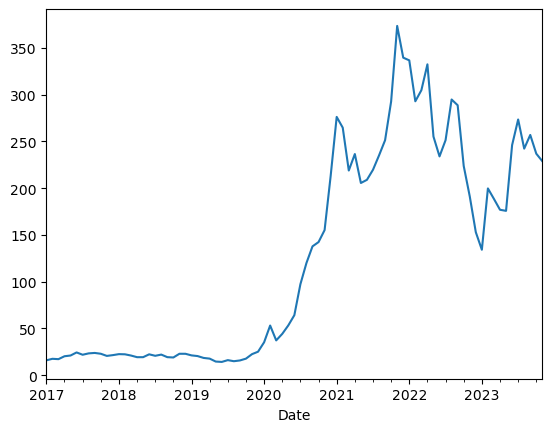

In [44]:
(raw_data
 .pipe(fix_cols)
 .resample('M')
 .Close
 .mean()
 .plot()
 )

## Candlestick Plot

,Open,High,Low,Close
Date,,,,
2023-01-01,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN
2023-01-03,118.470001,118.800003,104.639999,108.099998
2023-01-04,109.110001,114.589996,107.519997,113.639999
2023-01-05,110.510002,111.750000,107.160004,110.339996
...,...,...,...,...
2023-11-25,NaN,NaN,NaN,NaN
2023-11-26,NaN,NaN,NaN,NaN
2023-11-27,236.889999,238.330002,232.100006,236.080002


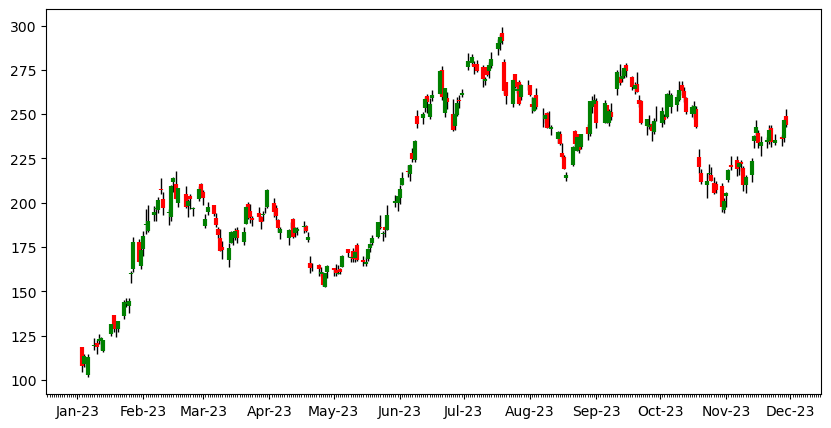

In [45]:
# Creating a plot_candle function and then making a candlistick plot for the daily data in 2023 (january-november)

fix, ax = plt.subplots(figsize=(10,5))
def plot_candle(df, ax):
    # wick
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    # red - decrease
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    # green - increase
    green = df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=3)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df

(raw_data
 .pipe(fix_cols)
 .resample('d') 
 .agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
 .loc['jan 2023' : 'nov 2023']
 .pipe(plot_candle, ax)
)

## Calculations

Plotting with pandas

In [47]:
raw_data.pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.000512,0.034811,0.015880,0.046085,0.046085,0.893117
2017-01-05,0.054342,-0.002281,0.035649,-0.001057,-0.001057,-0.472805
2017-01-06,0.002252,0.012441,0.015769,0.009967,0.009967,-0.064922
2017-01-09,0.008990,0.006991,0.011311,0.009912,0.009912,-0.280106
...,...,...,...,...,...,...
2023-11-22,0.029782,0.001601,-0.008314,-0.028980,-0.028980,-0.035469
2023-11-24,-0.034251,-0.021556,0.004019,0.005294,0.005294,-0.447860
2023-11-27,0.013433,-0.001759,-0.000990,0.002676,0.002676,0.720253


<Axes: xlabel='Date'>

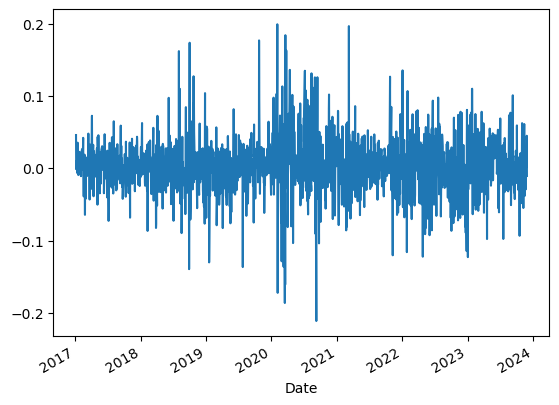

In [50]:
# Plotting returns

(raw_data
 .pct_change()
 .Close
 .plot()
 )


<Axes: >

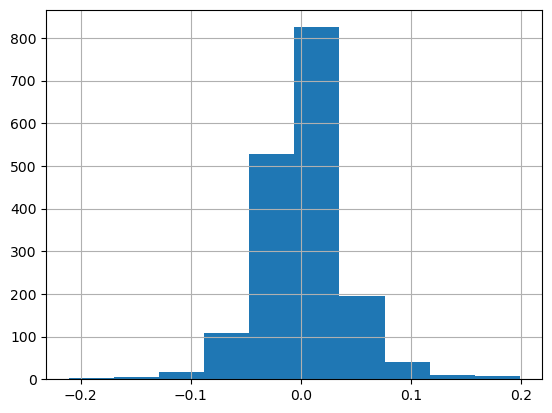

In [51]:
# Histogram of returns

(raw_data
 .pct_change()
 .Close
 .hist()
)

<Axes: >

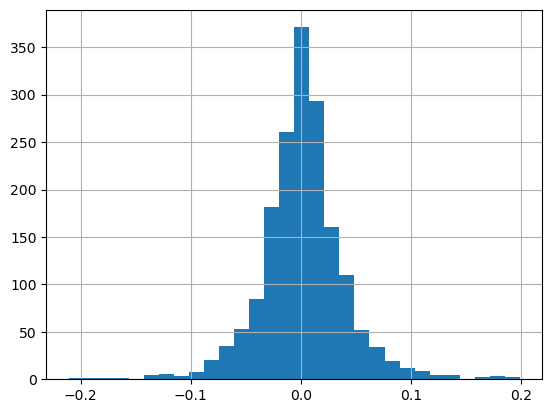

In [52]:
# Change bins

(raw_data
 .pct_change()
 .Close
 .hist(bins=30)
)

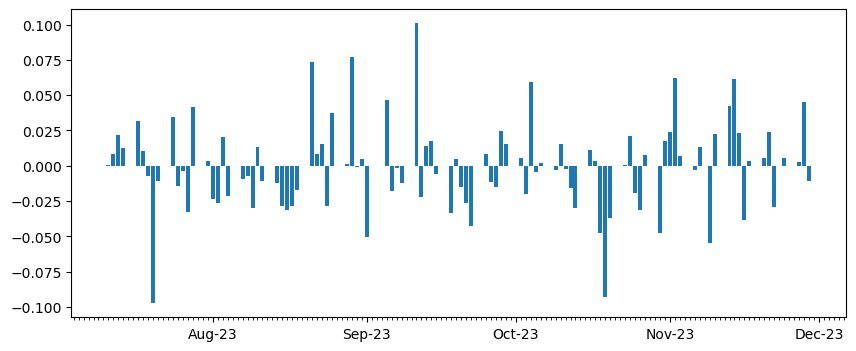

In [53]:
# For bar plots we use matplotlib instead of pandas because dates are broken in Pandas bar plots
 
def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

# Create a plot bar for the last 100 days

fig, ax = plt.subplots(figsize=(10,4))
_ = (raw_data
 .pct_change()
 .Close
 .iloc[-100:]
 .pipe(my_bar, ax)
)

## Cumulative returns

(current_price-original_price)/original_price

<Axes: xlabel='Date'>

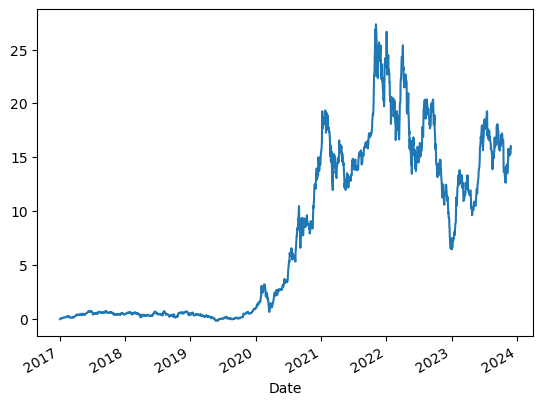

In [55]:
(raw_data
 .Close
 .sub(raw_data.Close[0])
 .div(raw_data.Close[0])
 .plot()
)

In [57]:
raw_data.cumprod

<bound method NDFrame._add_numeric_operations.<locals>.cumprod of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03   14.324000   14.688667   14.064000   14.466000   14.466000   
2017-01-04   14.316667   15.200000   14.287333   15.132667   15.132667   
2017-01-05   15.094667   15.165333   14.796667   15.116667   15.116667   
2017-01-06   15.128667   15.354000   15.030000   15.267333   15.267333   
2017-01-09   15.264667   15.461333   15.200000   15.418667   15.418667   
...                ...         ...         ...         ...         ...   
2023-11-22  242.039993  244.009995  231.399994  234.210007  234.210007   
2023-11-24  233.750000  238.750000  232.330002  235.449997  235.449997   
2023-11-27  236.889999  238.330002  232.100006  236.080002  236.080002   
2023-11-28  236.679993  247.000000  234.009995  246.720001  246.720001   
2023-11-29  249.210007  252.750000  242.759995

In [58]:
pd.core.generic.NDFrame.cumprod

<function pandas.core.generic.NDFrame.cumprod(self, axis: 'Axis | None' = None, skipna: 'bool_t' = True, *args, **kwargs)>

In [59]:
np.cumprod

<function numpy.cumprod(a, axis=None, dtype=None, out=None)>

<Axes: xlabel='Date'>

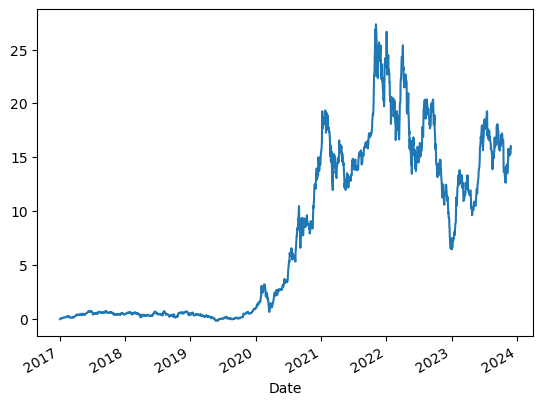

In [60]:
# Create a function for calculating
def calc_cum_returns(df, col):
    ser = df[col]
    return (ser
           .sub(ser[0])
           .div(ser[0])
           )

(raw_data
 .pipe(calc_cum_returns, 'Close')
 .plot()
)

In [61]:
def get_returns(df):
    return calc_cum_returns(df, 'Close')

get_returns(raw_data)

Date
2017-01-03     0.000000
2017-01-04     0.046085
2017-01-05     0.044979
2017-01-06     0.055394
2017-01-09     0.065856
                ...    
2023-11-22    15.190378
2023-11-24    15.276096
2023-11-27    15.319647
2023-11-28    16.055164
2023-11-29    15.876815
Name: Close, Length: 1739, dtype: float64

In [62]:
# Create a new column

(raw_data
.assign(cum_returns=lambda df:calc_cum_returns(df, 'Close'))
)

,Open,High,Low,Close,Adj Close,Volume,cum_returns
Date,,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,0.000000
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,0.046085
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,0.044979
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,0.055394
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,0.065856
...,...,...,...,...,...,...,...
2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600,15.190378
2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200,15.276096
2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800,15.319647


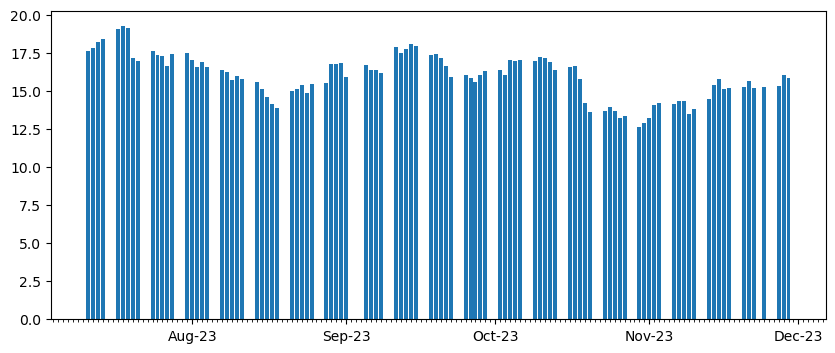

In [63]:
# Returns - using matplotlib
def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax = plt.subplots(figsize=(10, 4))
_ = (raw_data
 .pipe(calc_cum_returns, 'Close')
 .iloc[-100:]
 .pipe(my_bar, ax)
)

## Volatility

In [66]:
# Mean

(raw_data
 .Close
 .mean()
)

126.71811880689712

In [67]:
# Standard deviation

(raw_data
 .Close
 .std()
)

113.78571794673765

In [68]:
# Making a new column, called pct_change_close

(raw_data
 .assign(pct_change_close=raw_data.Close.pct_change()) 
 .pct_change_close
 .std()
)

0.03829604334744331

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

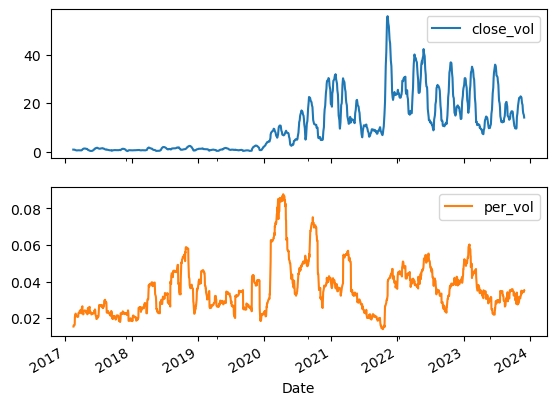

In [69]:
(raw_data
 .assign(close_vol=raw_data.rolling(30).Close.std(),
        per_vol=raw_data.Close.pct_change().rolling(30).std()) 
 .iloc[:, -2:]
 .plot(subplots=True)
)

In [70]:
# 7 day volatility
(raw_data
 .assign(pct_change_close=raw_data.Close.pct_change()) # Making a new column, called pct_change_close
 .resample('7D')
 .std()
)

,Open,High,Low,Close,Adj Close,Volume,pct_change_close
Date,,,,,,,
2017-01-03,0.465736,0.296336,0.484783,0.364316,0.364316,4.121114e+07,0.020570
2017-01-10,0.092250,0.238491,0.113543,0.267442,0.267442,1.797039e+07,0.019165
2017-01-17,0.350142,0.337653,0.317947,0.353614,0.353614,2.470690e+07,0.012386
2017-01-24,0.188660,0.131633,0.122814,0.108560,0.108560,1.438929e+07,0.012836
2017-01-31,0.128139,0.163834,0.084757,0.213189,0.213189,1.308207e+07,0.013429
...,...,...,...,...,...,...,...
2023-10-31,11.652407,11.164976,10.770827,8.940643,8.940643,3.495322e+06,0.025143
2023-11-07,5.058216,3.950843,5.303384,5.939871,5.939871,1.535477e+07,0.036507
2023-11-14,3.308407,4.010524,3.520629,3.702507,3.702507,1.393233e+07,0.035944


In [71]:
# 7 day rolling volatility
(raw_data
 .assign(pct_change_close=raw_data.Close.pct_change()) # Making a new column, called pct_change_close
 .rolling(window=7, min_periods=7)
 .std()
)

,Open,High,Low,Close,Adj Close,Volume,pct_change_close
Date,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-11-22,3.599022,3.758317,2.989688,3.664528,3.664528,1.474065e+07,0.033716
2023-11-24,3.728455,3.684042,2.982499,3.704551,3.704551,2.807013e+07,0.023947
2023-11-27,3.536860,2.873192,2.177160,2.551435,2.551435,2.511508e+07,0.021713


<Axes: xlabel='Date'>

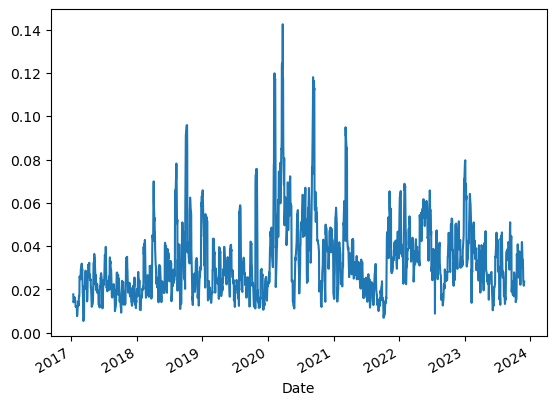

In [72]:
# 7 day volatility
(raw_data
 .assign(pct_change=raw_data.Close.pct_change()) # Making a new column, called pct_change_close
 .rolling(window=7, min_periods=7)
 .std()
 ['pct_change'] # if column name conflicts with ,ethod we need to use index access ([])
 .plot()
)

<Axes: xlabel='Date'>

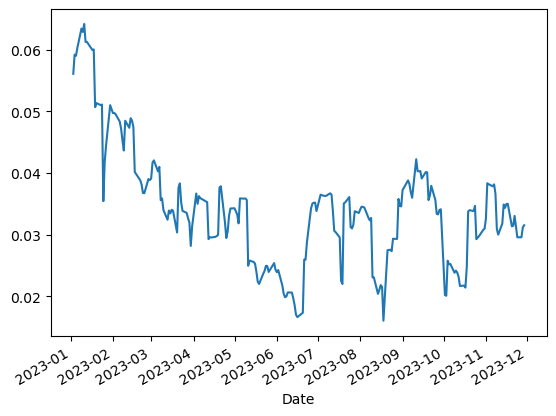

In [73]:
# Plot the rolling volatility over 15-day sliding windows for 2023 january-november

(raw_data
 .assign(pct_change=raw_data.Close.pct_change()) # Making a new column, called pct_change_close
 .rolling(window=15, min_periods=15)
 .pct_change
 .std()
 .loc['jan 2023': 'nov 2023']
 .plot()
)

## Rolling windows

In [74]:
(raw_data
 .assign(s1=raw_data.Close.shift(1),
         s2=raw_data.Close.shift(2),
         ma3=lambda df_:df_.loc[:,['Close', 's1', 's2']].mean(axis='columns'),
        ma3_builtin=raw_data.Close.rolling(3).mean()
        )
)

,Open,High,Low,Close,Adj Close,Volume,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,NaN,NaN,14.466000,NaN
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,14.466000,NaN,14.799333,NaN
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,15.132667,14.466000,14.905111,14.905111
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,15.116667,15.132667,15.172222,15.172222
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,15.267333,15.116667,15.267556,15.267556
...,...,...,...,...,...,...,...,...,...,...
2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600,241.199997,235.600006,237.003337,237.003337
2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200,234.210007,241.199997,236.953334,236.953334
2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800,235.449997,234.210007,235.246668,235.246668


<Axes: xlabel='Date'>

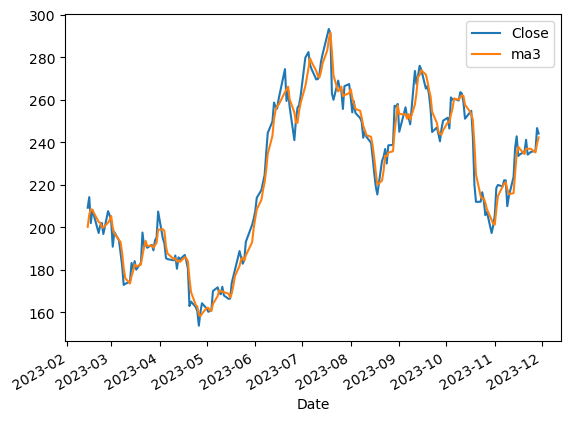

In [75]:
# Plotting moving average for the last 200 days

(raw_data
 .assign(s1=raw_data.Close.shift(1),
         s2=raw_data.Close.shift(2),
         ma3=lambda df_:df_.loc[:,['Close', 's1', 's2']].mean(axis='columns'),
        ma3_builtin=raw_data.Close.rolling(3).mean()
        )
 [['Close', 'ma3']]
 .iloc[-200:]
 .plot()
)



<Axes: xlabel='Date'>

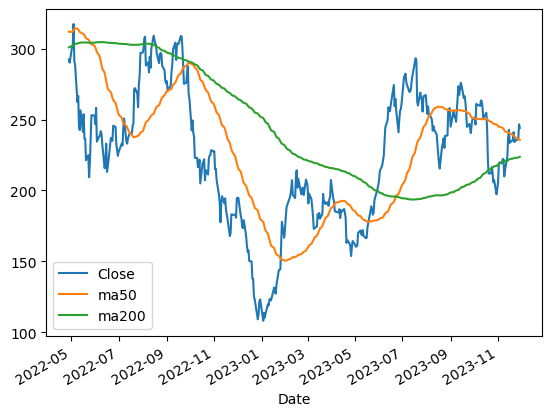

In [76]:
(raw_data
 .assign(
     ma50=raw_data.Close.rolling(50).mean(),
     ma200=raw_data.Close.rolling(200).mean(),
        )
 [['Close', 'ma50', 'ma200']]
 .iloc[-400:]
 .plot()
)

<Axes: xlabel='Date'>

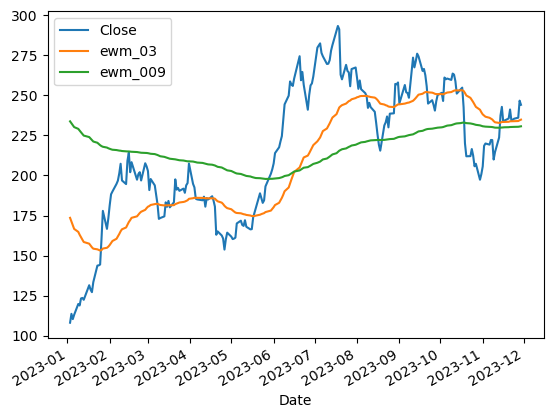

In [77]:
# Plot with Tesla close price in 2023 (January-November)
# Exponential moving average with alpha = 0.0392
# Exponential moving average with alpha = 0.00995 

(raw_data
 .assign(
     ewm_03=raw_data.Close.ewm(alpha=0.0392).mean(),
     ewm_009=raw_data.Close.ewm(alpha=0.00995).mean(),
        )
 [['Close', 'ewm_03', 'ewm_009']]
 .loc['jan 2023': 'nov 2023']
 .plot()
)

## On-balance Voluma (OBV)


In [78]:
# naive

def calc_obv(df):
    df = df.copy()
    df['OBV'] = 0.0
    
    # Loop through the data and calculate OBV
    for i in range(1, len(df)):
        if df['Close'][i] > df['Close'][i - 1]:
            df['OBV'][i] = df['OBV'][i - 1] + df['Volume'][i]
        elif df['Close'][i] > df['Close'][i - 1]:
            df['OBV'][i] = df['OBV'][i - 1] - df['Volume'][i]
        else:
            df['OBV'][i] = df['OBV'][i - 1]
    return df

calc_obv(raw_data)

/var/folders/4w/xddy0zcx5qgf4dm2s8p802wc0000gn/T/ipykernel_11231/382812507.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OBV'][i] = df['OBV'][i - 1] + df['Volume'][i]
/var/folders/4w/xddy0zcx5qgf4dm2s8p802wc0000gn/T/ipykernel_11231/382812507.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OBV'][i] = df['OBV'][i - 1]


,Open,High,Low,Close,Adj Close,Volume,OBV
Date,,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,0.000000e+00
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,1.682025e+08
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,1.682025e+08
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,2.511210e+08
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,3.108135e+08
...,...,...,...,...,...,...,...
2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600,1.188017e+11
2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200,1.188669e+11
2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800,1.189789e+11


In [80]:
%%timeit
calc_obv(raw_data)

/var/folders/4w/xddy0zcx5qgf4dm2s8p802wc0000gn/T/ipykernel_11231/382812507.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OBV'][i] = df['OBV'][i - 1] + df['Volume'][i]
/var/folders/4w/xddy0zcx5qgf4dm2s8p802wc0000gn/T/ipykernel_11231/382812507.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OBV'][i] = df['OBV'][i - 1]
/var/folders/4w/xddy0zcx5qgf4dm2s8p802wc0000gn/T/ipykernel_11231/382812507.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

135 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


/var/folders/4w/xddy0zcx5qgf4dm2s8p802wc0000gn/T/ipykernel_11231/382812507.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OBV'][i] = df['OBV'][i - 1] + df['Volume'][i]
/var/folders/4w/xddy0zcx5qgf4dm2s8p802wc0000gn/T/ipykernel_11231/382812507.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OBV'][i] = df['OBV'][i - 1]
/var/folders/4w/xddy0zcx5qgf4dm2s8p802wc0000gn/T/ipykernel_11231/382812507.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [81]:
# Use Lambdas to get access to new columns

(raw_data
 .assign(vol=np.select([raw_data.Close > raw_data.Close.shift(1),
                       raw_data.Close == raw_data.Close.shift(1),
                       raw_data.Close < raw_data.Close.shift(1)],
                      [raw_data.Volume, 0, -raw_data.Volume]),
        obv=lambda df_:df_.vol.cumsum(),
        )
) 

,Open,High,Low,Close,Adj Close,Volume,vol,obv
Date,,,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,0,0
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,168202500,168202500
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,-88675500,79527000
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,82918500,162445500
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,59692500,222138000
...,...,...,...,...,...,...,...,...
2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600,-117950600,15815629700
2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200,65125200,15880754900
2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800,112031800,15992786700


In [82]:
# Create a function to calculate the obv

def calc_obv(df, close_col='Close', vol_col='Volume'):
    close = df[close_col]
    vol = df[vol_col]
    close_shift = close.shift(1)
    return (df
           .assign(vol=np.select([close > close_shift,
                                 close == close_shift,
                                 close < close_shift],
                                [vol, 0, -vol]),
                  obv=lambda df_:df_.vol.fillna(0).cumsum()
                  )
           ['obv']
        )

(raw_data
 .assign(obv=calc_obv)
)

,Open,High,Low,Close,Adj Close,Volume,obv
Date,,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,0
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,168202500
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,79527000
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,162445500
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,222138000
...,...,...,...,...,...,...,...
2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600,15815629700
2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200,15880754900
2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800,15992786700


## Accumulation/Distribution Indicator (A/D)

In [83]:
(raw_data
 .assign(mfm=((raw_data.Close - raw_data.Low) - (raw_data.High - raw_data.Close))/(raw_data.High - raw_data.Low),
         mfv = lambda df_:df_.mfm * df_.Volume,
         cmfv = lambda df_:df_.mfv.cumsum())
)

,Open,High,Low,Close,Adj Close,Volume,mfm,mfv,cmfv
Date,,,,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,0.287084,2.550725e+07,2.550725e+07
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,0.852447,1.433838e+08,1.688910e+08
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,0.735988,6.526414e+07,2.341552e+08
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,0.465019,3.855866e+07,2.727138e+08
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,0.673471,4.020119e+07,3.129150e+08
...,...,...,...,...,...,...,...,...,...
2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600,-0.554320,-6.538237e+07,1.330142e+10
2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200,-0.028039,-1.826021e+06,1.329959e+10
2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800,0.277688,3.110990e+07,1.333070e+10


<Axes: xlabel='Date'>

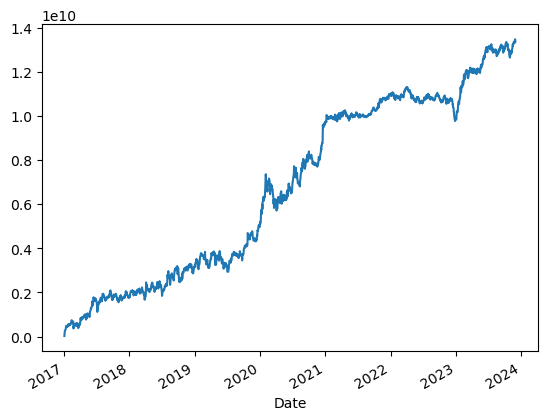

In [84]:
# Create a function to calculate the a/d

def calc_ad(df, close_col='Close', low_col='Low', high_col='High',
          vol_col='Volume'):
    close = df[close_col]
    low = df[low_col]
    high = df[high_col]
    return (df
        .assign(mfm=((close - low) - (high - close))/(high - low),
           mfv=lambda df_:df_.mfm * df_[vol_col],
           cmfv=lambda df_:df_.mfv.cumsum())
        .cmfv
    )
    
(raw_data
 .assign(ad=calc_ad)
 .ad
 .plot()
) 

## RSI

In [85]:
# Slow version
def avg(df, col, window_size=14):
    results = []
    window = []
    for i, val in enumerate(df[col]):
        window.append(val)
        if i < (window_size):
            results.append(np.nan)
        elif i == (window_size):
            window.pop(0)
            results.append(sum(window)/window_size)
        else:
            results.append((results[-1] * (window_size - 1) + val)
                           / window_size)
    return pd.Series(results, index=df.index)
    

(raw_data
 .assign(change = lambda df:df['Close'].diff(),
         gain = lambda df:df.change.clip(lower=0),
         loss = lambda df:df.change.clip(upper=0),
         avg_gain = lambda df:avg(df, col='gain'),
         avg_loss = lambda df:-avg(df, col='loss'),
         rs = lambda df:df.avg_gain/df.avg_loss,
         rsi = lambda df:np.select([df.avg_loss == 0], [100],
                                    (100-(100/(1+df.rs))))
        )
)

,Open,High,Low,Close,Adj Close,Volume,change,gain,loss,avg_gain,avg_loss,rs,rsi
Date,,,,,,,,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,0.666667,0.666667,0.000000,NaN,NaN,NaN,NaN
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,-0.016000,0.000000,-0.016000,NaN,NaN,NaN,NaN
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,0.150666,0.150666,0.000000,NaN,NaN,NaN,NaN
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,0.151334,0.151334,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,242.039993,244.009995,231.399994,234.210007,234.210007,117950600,-6.989990,0.000000,-6.989990,3.013325,2.675470,1.126278,52.969471
2023-11-24,233.750000,238.750000,232.330002,235.449997,235.449997,65125200,1.239990,1.239990,0.000000,2.886658,2.484365,1.161930,53.745027
2023-11-27,236.889999,238.330002,232.100006,236.080002,236.080002,112031800,0.630005,0.630005,0.000000,2.725468,2.306911,1.181436,54.158647
